In [1]:
import os
import logging
from dotenv import load_dotenv
import snowflake.connector

load_dotenv()

True

In [2]:
SNOWFLAKE_USER = os.getenv('SNOWFLAKE_USER')
SNOWFLAKE_PASSWORD = os.getenv('SNOWFLAKE_PASSWORD')
SNOWFLAKE_ACCOUNT = os.getenv('SNOWFLAKE_ACCOUNT')
SNOWFLAKE_WAREHOUSE = os.getenv('SNOWFLAKE_WAREHOUSE','FintechWH')
SNOWFLAKE_DATABASE = os.getenv('SNOWFLAKE_DATABASE','FintechDB')
SNOWFLAKE_SCHEMA = os.getenv('SNOWFLAKE_SCHEMA','FintechSchema')

In [65]:

def get_snowflake_connection():
    """
    Establishes a connection to Snowflake using credentials from .env
    """
    try:
        conn = snowflake.connector.connect(
            user=SNOWFLAKE_USER,
            password=os.getenv('SNOWFLAKE_PASSWORD'),
            account=SNOWFLAKE_ACCOUNT,
            warehouse=SNOWFLAKE_WAREHOUSE,
            database=SNOWFLAKE_DATABASE,
            schema=SNOWFLAKE_SCHEMA
        )
        print("Successfully connected to Snowflake")
        return conn
    except Exception as e:
        print(f"Failed to connect to Snowflake: {str(e)}")
        raise

In [6]:
conn = get_snowflake_connection()

Successfully connected to Snowflake


In [ ]:
query_customer = """
SELECT *
FROM raw_data_customer_dim
"""

query_loan = """
SELECT *
FROM raw_data_loans_dim
"""

query_support = """
SELECT *
FROM raw_data_support_ticket_dim
""" 

query_transaction = """
SELECT *
FROM raw_data_transaction_fact
"""



In [25]:
query = """select * from raw_data_transaction_fact"""

In [26]:
df= pd.read_sql(query,conn)
conn.close()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5964\2054740386.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql(query,conn)


In [27]:
df.head()

,TRANSACTION_ID,CUSTOMER_ID,AMOUNT,TRANSACTION_TYPE,TRANSACTION_DATE
0,bf4cddcb-3181-4e1b-ba92-254a934fd3c4,CUST1000,1381,POS,2024-09-21
1,a37ed803-7e22-47af-869d-dec0100fca3b,CUST1000,717,Bill Payment,2024-07-30
2,2ba73ee0-5505-4b5a-a9d0-9cd6a309900d,CUST1000,834,Airtime,2024-05-30
3,84836691-dc41-4805-938d-a3bb2c6c0359,CUST1000,923,Bill Payment,2024-10-19
4,b671d1bd-600b-4724-b976-ab05e80b5759,CUST1000,1831,Bill Payment,2025-10-31


In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [67]:
def fetch_data(tables):
    conn = get_snowflake_connection()
    fetched_data = []

    for table_names in tables:
        query = table_names
        df = pd.read_sql(query, conn)
        fetched_data.append(df)
        
    conn.close()
    return fetched_data



In [68]:
tables = [query_transaction, query_loan, query_customer,query_support]

In [62]:
tables[3]

'\nSELECT *\nFROM raw_data_supported_ticket_dim\n'

In [69]:
fetch_Data = fetch_data(tables)

Successfully connected to Snowflake


C:\Users\DELL\AppData\Local\Temp\ipykernel_5964\1378671378.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5964\1378671378.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [70]:
fetch_Data[0]

,TRANSACTION_ID,CUSTOMER_ID,AMOUNT,TRANSACTION_TYPE,TRANSACTION_DATE
0,bf4cddcb-3181-4e1b-ba92-254a934fd3c4,CUST1000,1381,POS,2024-09-21
1,a37ed803-7e22-47af-869d-dec0100fca3b,CUST1000,717,Bill Payment,2024-07-30
2,2ba73ee0-5505-4b5a-a9d0-9cd6a309900d,CUST1000,834,Airtime,2024-05-30
3,84836691-dc41-4805-938d-a3bb2c6c0359,CUST1000,923,Bill Payment,2024-10-19
4,b671d1bd-600b-4724-b976-ab05e80b5759,CUST1000,1831,Bill Payment,2025-10-31
...,...,...,...,...,...
8168,f7132185-3d26-4179-9cf0-7d08149cb0ba,CUST1299,1977,Airtime,2024-04-10
8169,03a686f2-5d3b-47f8-93ad-61acb3406bca,CUST1299,1259,Bill Payment,2024-09-24
8170,35c6ffd3-382e-4203-8de9-6c5c5b024084,CUST1299,804,POS,2024-08-31
8171,91ee4767-fd3b-4c94-98ac-d4c01e476699,CUST1299,568,Transfer,2024-08-29


In [73]:
fetch_Data[3]

,TICKER_ID,CUSTOMER_ID,ISSUE_TYPE,SEVERITY,CREATED_AT


In [45]:
Transaction_dataset = fetch_Data[0]
Loan_dataset = fetch_Data[1]
Customer_dataset = fetch_Data[2]
Support_dataset = fetch_Data[3]

In [46]:
Transaction_dataset.head()

,TRANSACTION_ID,CUSTOMER_ID,AMOUNT,TRANSACTION_TYPE,TRANSACTION_DATE
0,bf4cddcb-3181-4e1b-ba92-254a934fd3c4,CUST1000,1381,POS,2024-09-21
1,a37ed803-7e22-47af-869d-dec0100fca3b,CUST1000,717,Bill Payment,2024-07-30
2,2ba73ee0-5505-4b5a-a9d0-9cd6a309900d,CUST1000,834,Airtime,2024-05-30
3,84836691-dc41-4805-938d-a3bb2c6c0359,CUST1000,923,Bill Payment,2024-10-19
4,b671d1bd-600b-4724-b976-ab05e80b5759,CUST1000,1831,Bill Payment,2025-10-31


In [47]:
Transaction_dataset.isnull().sum()

TRANSACTION_ID      0
CUSTOMER_ID         0
AMOUNT              0
TRANSACTION_TYPE    0
TRANSACTION_DATE    0
dtype: int64

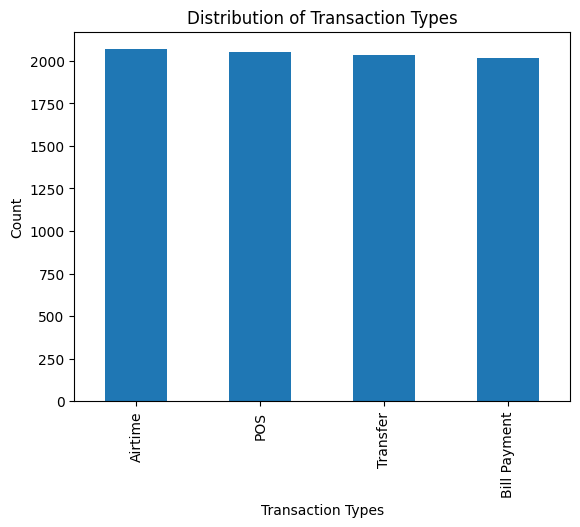

In [51]:
Transaction_dataset.TRANSACTION_TYPE.value_counts().plot(kind = 'bar')
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Types")
plt.ylabel("Count")
plt.show()

In [56]:
Loan_dataset.head()

,LOAN_ID,CUSTOMER_ID,LOAN_AMOUNT,LOAN_STATUS,LOAN_DATE


In [57]:
Customer_dataset

,CUSTOMER_ID,NAME,AGE,SIGNUP_DATE,COUNTRY
0,CUST1000,Jody Bell,36,2024-09-26,Rwanda
1,CUST1001,Jerry Mcgrath,34,2023-07-29,Benin
2,CUST1002,Amy Alvarez,55,2025-07-12,Egypt
3,CUST1003,Eric Cochran,34,2023-12-14,Dominica
4,CUST1004,Matthew Waters,48,2024-08-24,French Guiana
...,...,...,...,...,...
291,CUST1295,Angela Winters,21,2025-09-04,Sudan
292,CUST1296,Wendy Brown,34,2024-03-29,Saint Lucia
293,CUST1297,Jenna Floyd,52,2025-02-10,Suriname
294,CUST1298,Rhonda Navarro,39,2025-05-02,Martinique


In [58]:
Support_dataset

,TICKER_ID,CUSTOMER_ID,ISSUE_TYPE,SEVERITY,CREATED_AT
